# Research Quesiton: Transforming Samples from the Canonical Simplex to the l1-Ball

We define the canonical simplex $\Omega^n$ living in $\mathbb{R}^{n}$ as
$$
\Omega^n = \{(x_0,\dots,x_{n-1}) \in \mathbb{R}^{n} : x_0 + \dots + x_{n-1} \leq 1 \; \text{and} \; x_i \ge 0 \; \forall \, i\}. 
$$

Generating m samples that are Uniform in $\Omega^n$ is quite fun with a small algorithm as follows:

For i=1 to m:

    1.) Pick a point u uniform in (0,1).
    2.) Add u to the list l containing elements 0 and 1.
    3.) Sort l in ascending order.
    For j=1 to n:
        -Set the vector v[j-1] = l[j] - l[j-1].
    4.) Append the vector v to the set of samples uniform in the canonical simplex
Output: m samples uniform in $\Omega^n$

In [55]:
import numpy as np
import matplotlib.pyplot as plt


n = 2
samples = 3000
S = np.zeros((n,1))
verbose = False
#Uniform samples from the n-dimensional simplex 
for i in range(samples):
    U = np.random.uniform(0,1,n)
    if(verbose):
        print("U(0,1) with n = 2:")
        print(U)
        print("")
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    if(verbose):
        print("Append the x and y to the list of 0 and 1:")
        print(U)
        print("")
    U = np.sort(U)
    if(verbose):
        print("Now sort the list in ascending order:")
        print(U)
        print("")
    for i in range(1,n+1):
        if(verbose):
            print(f"Iteration {i}:")
            print(f"Subracting {U[i]} - {U[i-1]} = {U[i] - U[i-1]}")
        Final[i-1] = U[i] - U[i-1]
        if(verbose):
            print(f"Final[{i-1}] = {U[i] - U[i-1]}")
            print(Final)
            print("")
    if(verbose):
        print("A point Uniform in the canonical n-simplex: ")
        print(Final)
        print("----------------------------------------------------------\n")
    S = np.hstack((S, np.reshape(Final, (n,1))))
S = np.delete(S, 0,1)


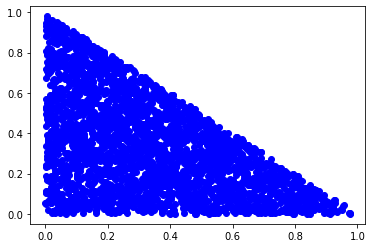

In [56]:
plt.plot(S[0,:], S[1,:], "bo");

If we compare the definition of $\Omega^n$ to the definition of the $\ell_1$ norm:

$$
\Omega^n = \{(x_0,\dots,x_{n-1}) \in \mathbb{R}^{n} : x_0 + \dots + x_{n-1} \leq 1 \; \text{and} \; x_i \ge 0 \; \forall \, i\}.
$$ 

$$
\| x\|_1 = \sum_{i=1}^\infty |x_i|
$$

Now, lets bound this to be

$$
\| x\|_1 \leq 1
$$

The $x_i \in \Omega^n$ are restricted to quadrant 1, but the $x_i \in \| x\|_1$ can exist in any quadrant.

So, how can we perserve uniformity and allow the points in $\Omega^n$ to exist in any quadrant?

We can simulate a coin flip using the binomial distribution, and depending on heads or tails flip the sign.

In [57]:
for i in range(S.shape[1]):
    binom = np.random.binomial(1,.5)
    if(binom == 1):
        S[0][i] = S[0][i]*(-1)

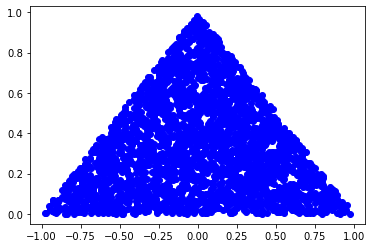

In [58]:
plt.plot(S[0,:], S[1,:], "bo");

In [59]:
for i in range(S.shape[1]):
    binom = np.random.binomial(1,.5)
    if(binom == 1):
        S[1][i] = S[1][i]*(-1)

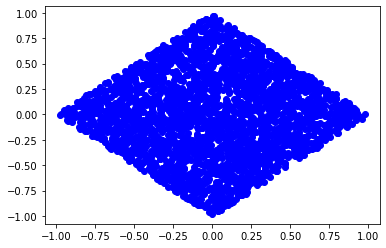

In [60]:
plt.plot(S[0,:], S[1,:], "bo");